In [1]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_set = bagreader('/home/shreejit/Desktop/eece5554/LAB1/src/data/stationary_data.bag')

[INFO]  Data folder /home/shreejit/Desktop/eece5554/LAB1/src/data/stationary_data already exists. Not creating.


In [3]:
data_set.topic_table

,Topics,Types,Message Count,Frequency
0,/gps,gps_driver/gps_msg,613,1.000096


In [4]:
gps_topic = data_set.message_by_topic(topic = '/gps')
gps_df = pd.read_csv(gps_topic)

In [5]:
gps_df.head()

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,UTM_easting,UTM_northing,Zone,Letter
0,1.664201e+09,10,1664212195,0,GPS1_Frame,42.314308,-71.104813,67.099998,326541.09375,4686819.5,19,T
1,1.664201e+09,11,1664212196,0,GPS1_Frame,42.314308,-71.104813,67.099998,326541.09375,4686819.5,19,T
2,1.664201e+09,12,1664212197,0,GPS1_Frame,42.314308,-71.104813,67.099998,326541.09375,4686819.5,19,T
3,1.664201e+09,13,1664212198,0,GPS1_Frame,42.314308,-71.104813,67.099998,326541.09375,4686819.5,19,T
4,1.664201e+09,14,1664212199,0,GPS1_Frame,42.314308,-71.104813,67.099998,326541.09375,4686819.5,19,T


In [7]:
#Converting data to numpy arrays for simplicity
time_array = gps_df['Time'].to_numpy()
lat_array = gps_df['Latitude'].to_numpy()
long_array = gps_df['Longitude'].to_numpy()
# altitude_array = gp
# s_df['Altitude'].to_numpy()
easting_array = gps_df['UTM_easting'].to_numpy()
northing_array = gps_df['UTM_northing'].to_numpy()
time_array = time_array - 1.66420056e+09 + 5 #converting timestamp to start-time

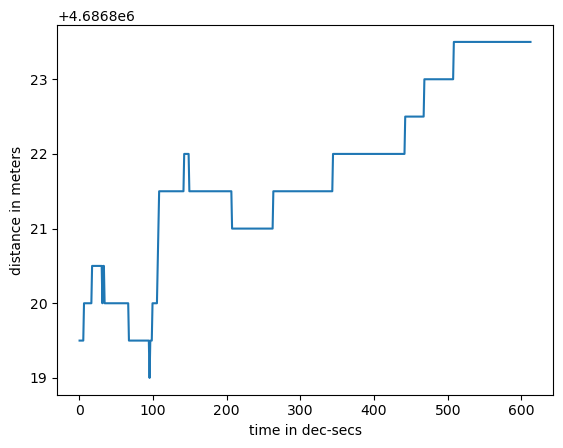

In [9]:
#2-Dimensional plot for stationary

fig1, ax = plt.subplots()
ax.set_xlabel('time in dec-secs')
ax.set_ylabel('distance in meters')
Northing_error = northing_array-northing_array.mean()
# plt.axhline(y=48.775367, color='r', linestyle='-', label='mean')
# ax.plot(time_array,lat_array,label='Latitude')
# # ax.plot(time_array,long_array,label='Longitude')
# ax.plot(time_array,northing_array,label='Northing_reading')
# ax.plot(time_array,easting_array,label='Easting_reading')
# ax.plot(time_array,altitude_array,label='Altitude')
ax.plot(time_array, northing_array)
# ax.legend(loc=7)

In [14]:
#Statistical summary
gps_df.agg(

    {

        "Latitude": ["mean", "skew", "std", "max", "min"],

        "Longitude": ["mean", "skew", "std", "max", "min"],
        
        "UTM_northing": ["mean", "skew", "std", "max", "min"],

        "UTM_easting": ["mean", "skew", "std", "max", "min"],
        
        "Altitude": ["mean", "skew", "std", "max", "min"],

    }

)

,Latitude,Longitude,UTM_northing,UTM_easting,Altitude
mean,42.314325,-71.104829,4.686822e+06,326539.841507,48.775367
skew,-0.345438,-0.448219,-1.125093e-01,-0.265974,1.168010
std,0.000010,0.000014,1.163705e+00,1.115699,7.661526
max,42.314339,-71.104805,4.686824e+06,326541.906250,67.099998
min,42.314301,-71.104858,4.686819e+06,326537.750000,40.799999


In [4]:
data_set2 = bagreader('/home/shreejit/Desktop/eece5554/LAB1/src/data/walking_data.bag')

[INFO]  Successfully created the data folder /home/shreejit/Desktop/eece5554/LAB1/src/data/walking_data.


In [5]:
gps_topic_w = data_set2.message_by_topic(topic = '/gps')
gps_df_w = pd.read_csv(gps_topic_w)

In [6]:
gps_df_w.head()

,Time,Header.seq,Header.stamp.secs,Header.stamp.nsecs,Header.frame_id,Latitude,Longitude,Altitude,UTM_easting,UTM_northing,Zone,Letter
0,1.664200e+09,11,1664212160,0,GPS1_Frame,42.312397,-71.101723,73.900002,326790.65625,4686601.5,19,T
1,1.664200e+09,12,1664212161,0,GPS1_Frame,42.312397,-71.101723,73.300003,326790.50000,4686601.5,19,T
2,1.664200e+09,13,1664212162,0,GPS1_Frame,42.312389,-71.101730,72.199997,326790.06250,4686600.5,19,T
3,1.664200e+09,14,1664212163,0,GPS1_Frame,42.312386,-71.101730,71.699997,326789.78125,4686600.0,19,T
4,1.664200e+09,15,1664212164,0,GPS1_Frame,42.312389,-71.101738,71.900002,326789.25000,4686600.5,19,T


In [8]:
#Converting data to numpy arrays for simplicity
time_array = gps_df_w['Time'].to_numpy()
lat_array = gps_df_w['Latitude'].to_numpy()
long_array = gps_df_w['Longitude'].to_numpy()
altitude_array = gps_df_w['Altitude'].to_numpy()
easting_array = gps_df_w['UTM_easting'].to_numpy()
northing_array = gps_df_w['UTM_northing'].to_numpy()
time_array = time_array - 1.66419974e+09 + 1 #converting timestamp to start-time

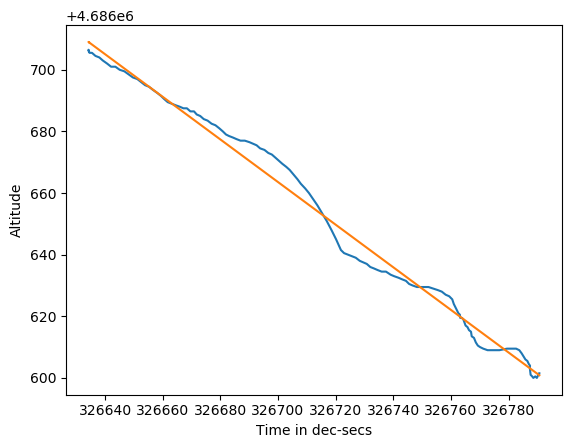

In [11]:
import math
#2-Dimensional plot for stationary
fig1, ax = plt.subplots()
ax.set_xlabel('Time in dec-secs')
ax.set_ylabel('Altitude')

#Finding best fit line using poly fit ->
a, b = np.polyfit(easting_array,northing_array,1)
#plots

# plt.axhline(y=48.775367, color='r', linestyle='-', label='mean')
# ax.plot(time_array,lat_array_norm,label='Latitude')
# ax.plot(lat_array_norm, long_array_norm)
ax.plot(easting_array,northing_array)
ax.plot(easting_array,a*easting_array+b)
# plt.axhline(y=48.274834, color='r', linestyle='-', label='mean')
# ax.plot(time_array,altitude_array)
# ax.plot(time_array,northing_array,label='Northing_reading')
# ax.plot(time_array,easting_array,label='Easting_reading')
# ax.legend(loc=7)

#finding RMSE of our points vs straight line -
MSE = np.square(np.subtract(northing_array,a*easting_array+b)).mean()
RMSE = math.sqrt(MSE)

In [20]:
RMSE

3.545039526727938

In [8]:
gps_df_w.agg(

    {

        "Latitude": ['max', 'min'],

        "Longitude": ["max", 'min'],
        
        "UTM_northing": ['max', 'min'],

        "UTM_easting": ['max', 'min'],
        
        "Altitude": ["max", "min"],

    }

)

,Latitude,Longitude,UTM_northing,UTM_easting,Altitude
max,42.313305,-71.101723,4686706.5,326790.65625,73.900002
min,42.312386,-71.103653,4686600.0,326634.21875,23.900000


In [38]:
Northing_distance_travelled = max(gps_df_w['UTM_northing']) - min(gps_df_w['UTM_northing'])
Easting_distance_travelled = max(gps_df_w['UTM_easting']) - min(gps_df_w['UTM_easting'])
print(Northing_distance_travelled)
print(Easting_distance_travelled)
Distance_travelled_actual = 120
Distance_travelled_gps = math.sqrt(Northing_distance_travelled**2+Easting_distance_travelled**2)

#Error in gps data v/s actual data

Error = Distance_travelled_gps-Distance_travelled_actual
Error_perc = (Error/120)*100

print('Gps distance travelled %f'%Distance_travelled_gps)
print('Error in meters %f'%Error)
print('Error percentage %f'%Error_perc)

106.5
156.4375
Gps distance travelled 189.248359
Error in meters 69.248359
Error percentage 57.706966
